# Aufgabe 6

## a)

Die accuracy/Genauigkeit ist eine nutzbare Metrik, solange ein ausgeglichenes Datenset zu Grunde liegt. Da die Confusion Matrix zur Validierung der Ergebnisse eingesetzt wurde und diese bestätigt, ist in diesem Fall die accuracy geeignet.

## b)

Meine Schlussfolgerung ist, dass mit Hilfe der Struktur der Server die ANalyse der Daten mit Tools bereichert wird und somit für die gebräuchlichsten Anwendungen eine Zeitersparnis für das Erstellen eines Analyseprogramms.

## c)

Das kann sein, wenn wie in a genannt die Genauigkeit keine geeignete Metrik ist.
Die Verhaltensanalyse von Kunden würde in die Interpendanzanalyse fallen. Man versucht eine Gruppierung anhand der vorhanden Daten zu finden.

# Code

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import os.path
from os import getcwd

In [2]:
# Load dataset
cwd = os.getcwd()
file = os.path.join(cwd, "Datasets","Iris.csv")
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset = pandas.read_csv(file, header=0, index_col=0)

In [3]:
# shape
print(dataset.shape)

(150, 5)


In [4]:
# head
print(dataset.head(20))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setosa
11            5.4           3.7            1.5           0.2  Iris-setosa
12            4.8           3.4       

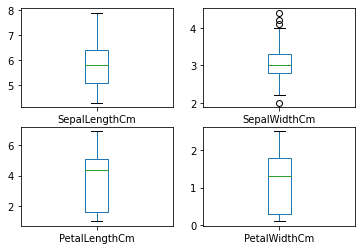

In [5]:
# box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

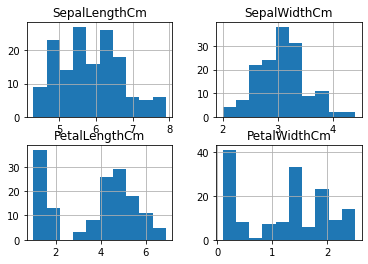

In [6]:
# histograms
dataset.hist()
plt.show()

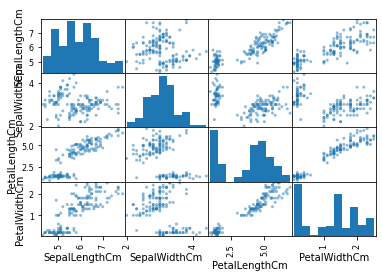

In [7]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [8]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
# Test options and evaluation metric
seed = 7
scoring = "accuracy"

In [10]:
# Spot Check Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Anwender\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anwender\anaconda3\envs\praktikum\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


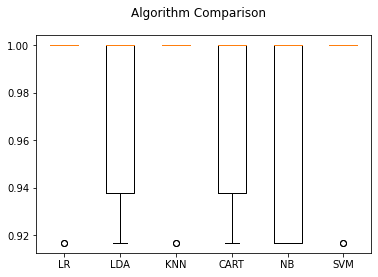

In [11]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

